In [2]:
##comments
## observation

In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Loading the datset from sklearn
from sklearn.datasets import fetch_openml
housing=fetch_openml(name='house_prices',as_frame=True)


In [5]:
#Independent variable shape
df1=housing['data']

In [6]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal


In [7]:
#dependent variable
df2=housing['target']

In [56]:
df2.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [8]:
df=pd.concat([df1,df2],axis=1)

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [10]:
#dimension of dataset
df.shape

(1460, 81)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [12]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

In [15]:
feature_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


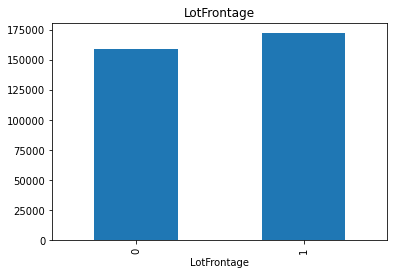

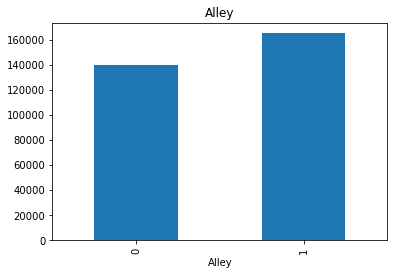

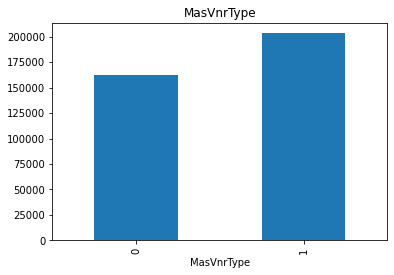

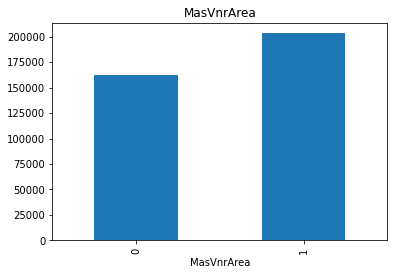

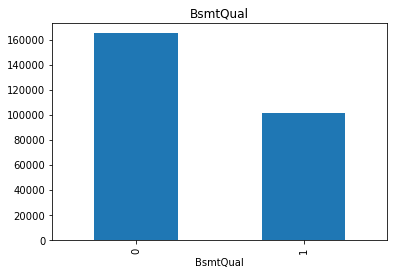

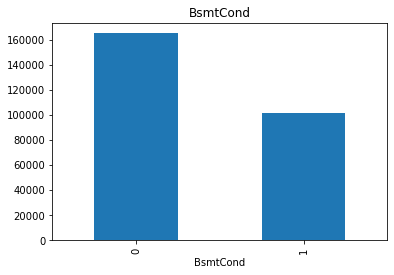

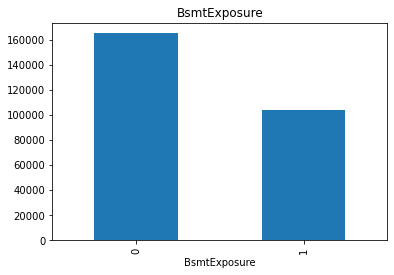

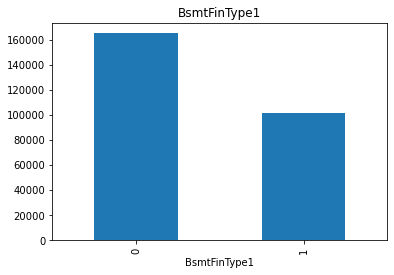

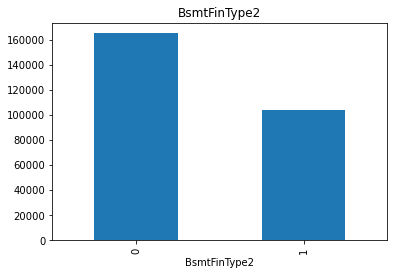

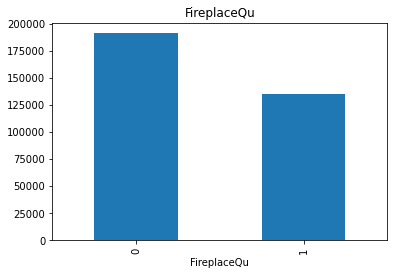

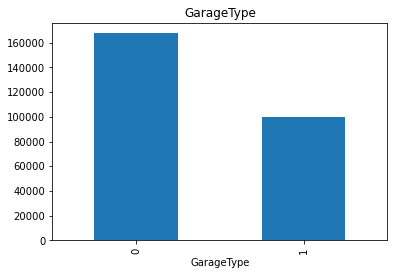

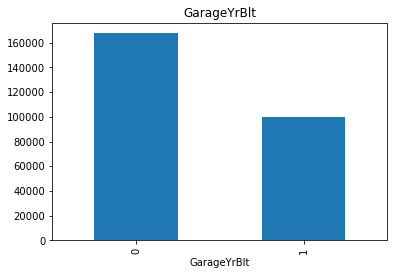

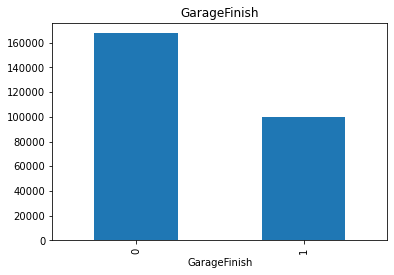

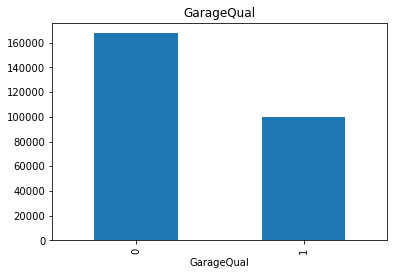

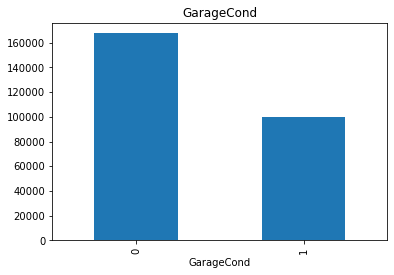

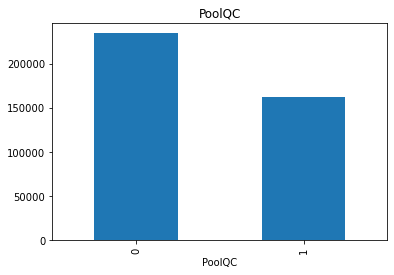

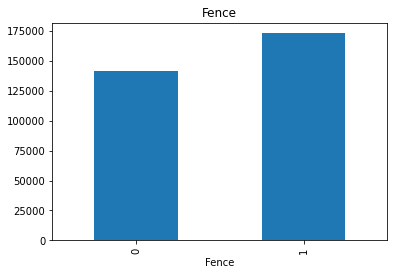

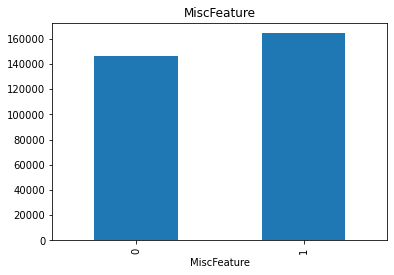

In [17]:
for feature in feature_with_na:
# replacing missing value with 1 otherswise 0 for plotting
    df[feature]=np.where(df[feature].isnull(),1,0)
# finding relation between feature & sales price 
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#Missing values are having relation with dependent variable.So we need to replace missing(NaN) value with meaningful values.

In [18]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,0,8450.0,Pave,1,Reg,Lvl,AllPub,...,0.0,1,1,1,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,0,9600.0,Pave,1,Reg,Lvl,AllPub,...,0.0,1,1,1,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,0,11250.0,Pave,1,IR1,Lvl,AllPub,...,0.0,1,1,1,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,0,9550.0,Pave,1,IR1,Lvl,AllPub,...,0.0,1,1,1,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,0,14260.0,Pave,1,IR1,Lvl,AllPub,...,0.0,1,1,1,0.0,12.0,2008.0,WD,Normal,250000.0


In [19]:
#Finding the  numerical features
num_features=[feature for feature in df.columns if df[feature].dtypes!='O']

In [20]:
num_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [21]:
len(num_features)

53

In [22]:
df[num_features].head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,0,8450.0,1,7.0,5.0,2003.0,2003.0,0,...,0.0,0.0,0.0,1,1,1,0.0,2.0,2008.0,208500.0
1,2.0,20.0,0,9600.0,1,6.0,8.0,1976.0,1976.0,0,...,0.0,0.0,0.0,1,1,1,0.0,5.0,2007.0,181500.0
2,3.0,60.0,0,11250.0,1,7.0,5.0,2001.0,2002.0,0,...,0.0,0.0,0.0,1,1,1,0.0,9.0,2008.0,223500.0
3,4.0,70.0,0,9550.0,1,7.0,5.0,1915.0,1970.0,0,...,0.0,0.0,0.0,1,1,1,0.0,2.0,2006.0,140000.0
4,5.0,60.0,0,14260.0,1,8.0,5.0,2000.0,2000.0,0,...,0.0,0.0,0.0,1,1,1,0.0,12.0,2008.0,250000.0


Temporal variables
 We have some of the year features we need need the relation between year fetaures & Target variabl(SalePrice)

In [23]:
year_feature=[feature for feature in num_features if 'Year'in feature or 'Yr' in feature]

In [24]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [25]:
df[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003.0,2003.0,0,2008.0
1,1976.0,1976.0,0,2007.0
2,2001.0,2002.0,0,2008.0
3,1915.0,1970.0,0,2006.0
4,2000.0,2000.0,0,2008.0


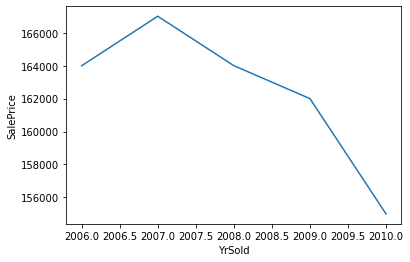

In [26]:
# relation between year sold & saleprice
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()



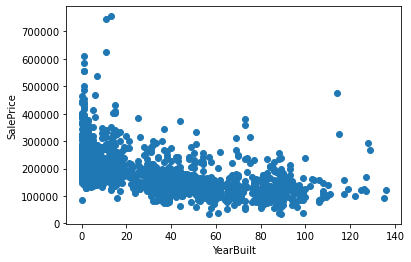

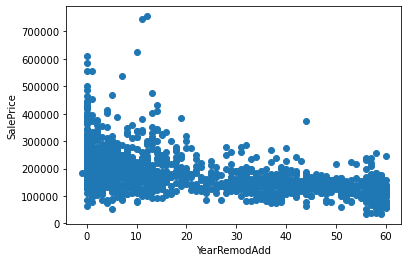

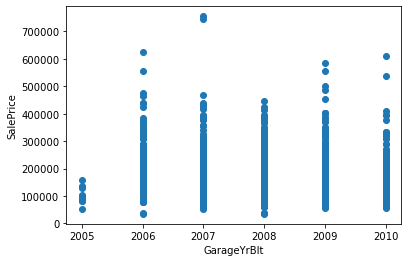

In [27]:
# We will find the difference between All year feature with YrSold & Sale Price
for feature in year_feature:
    if feature!='YrSold':
        df[feature]=df["YrSold"]-df[feature]
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


In [28]:
# Discrete variables
discrete_features=[feature for feature in num_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]

In [29]:
discrete_features

['MSSubClass',
 'LotFrontage',
 'Alley',
 'OverallQual',
 'OverallCond',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold']

In [30]:
len(discrete_features)

34

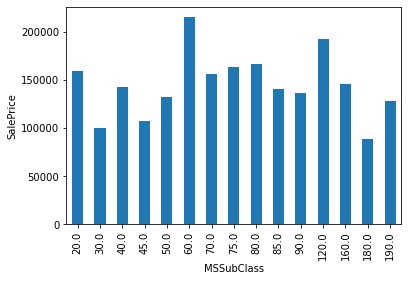

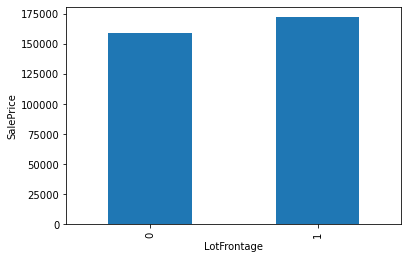

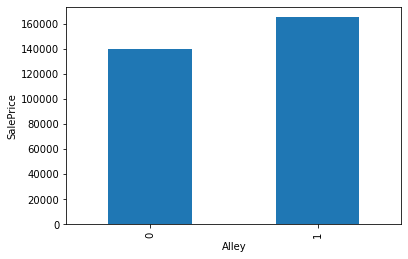

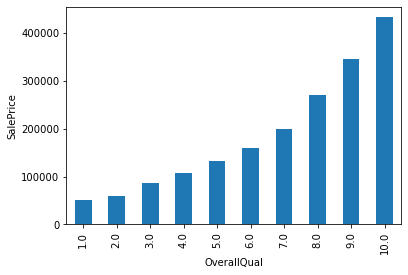

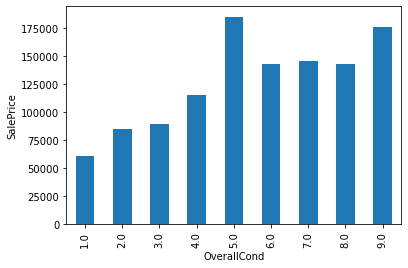

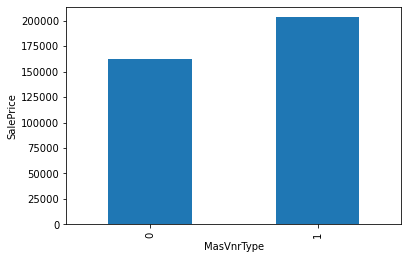

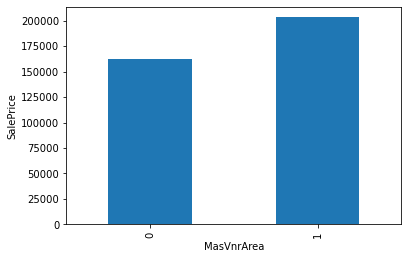

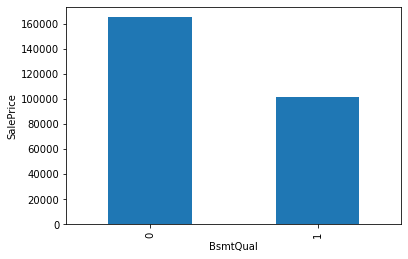

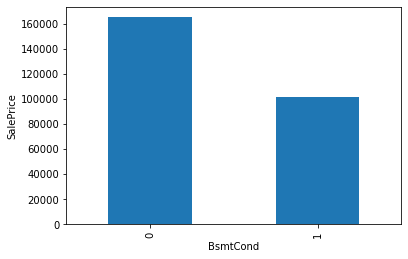

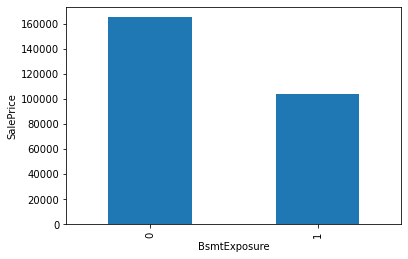

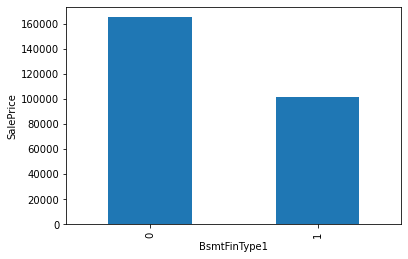

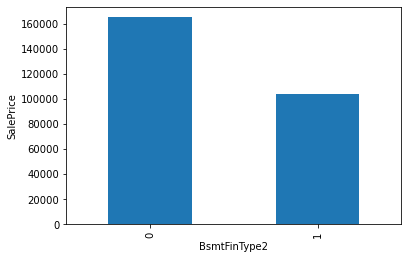

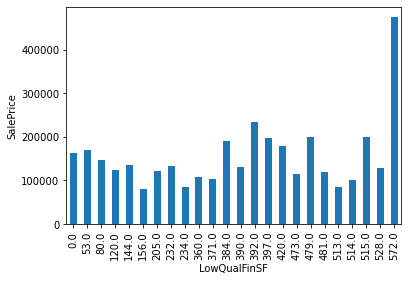

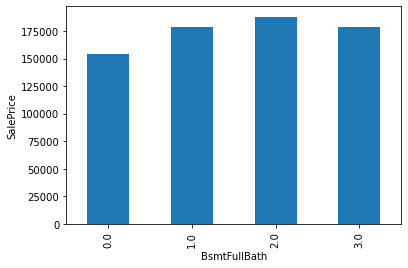

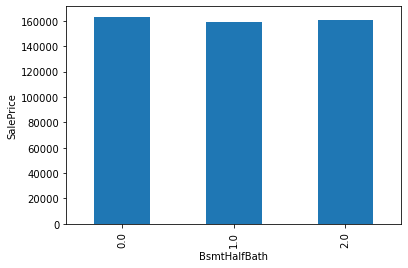

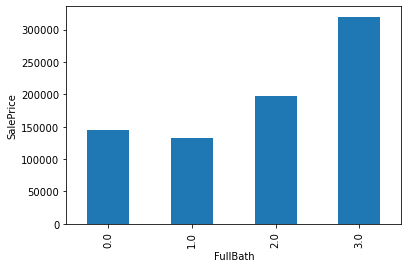

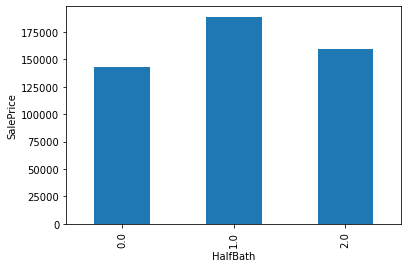

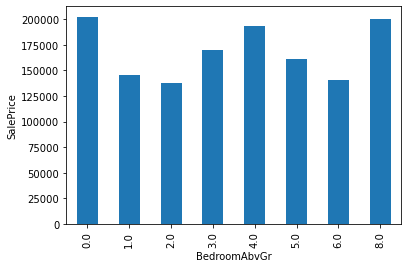

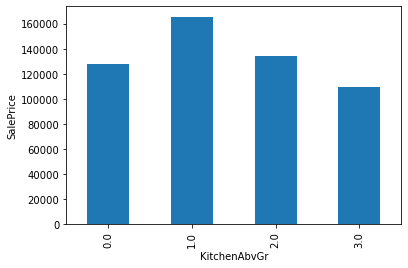

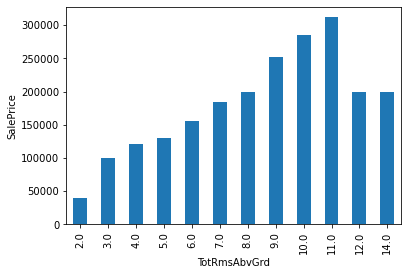

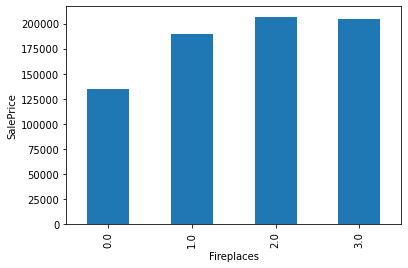

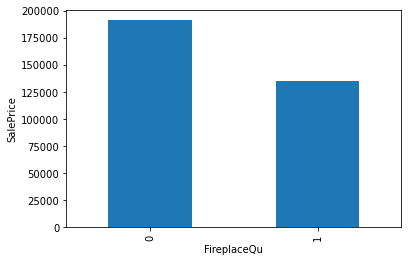

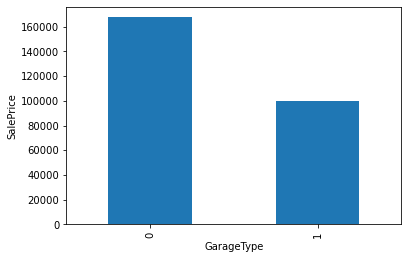

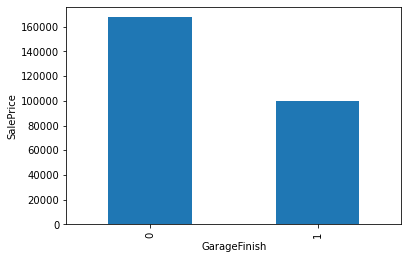

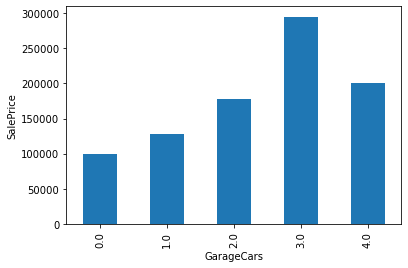

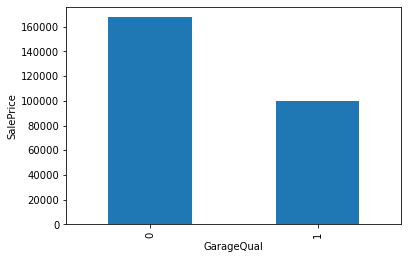

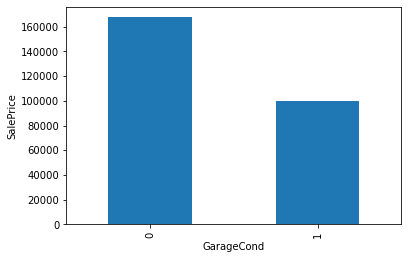

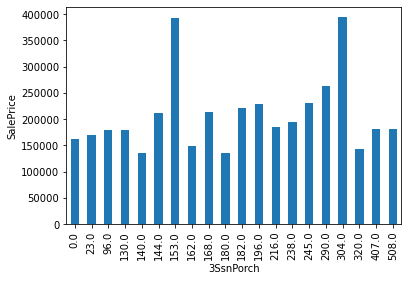

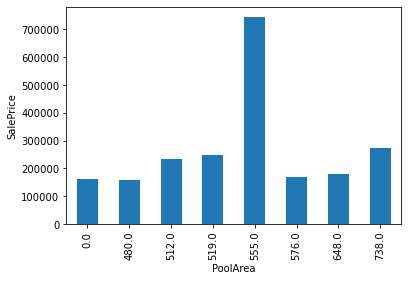

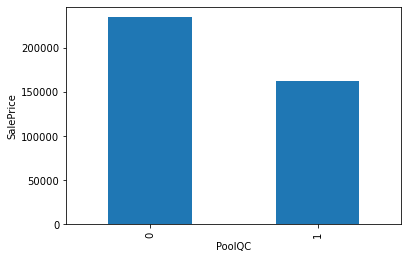

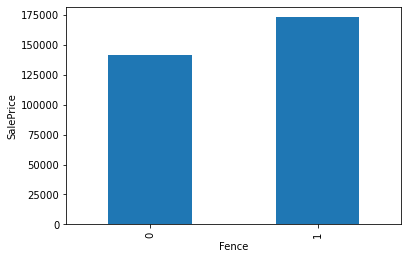

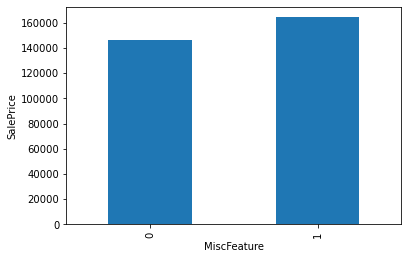

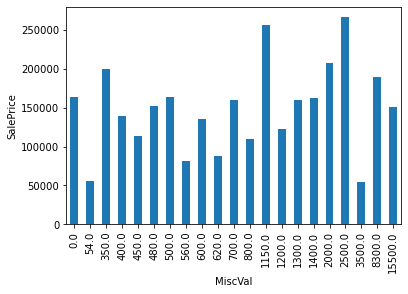

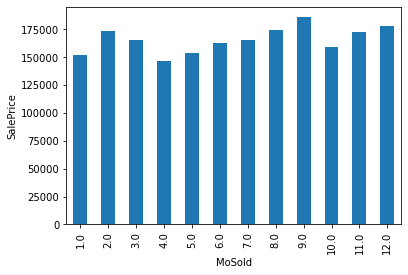

In [31]:
# relation between discrete variables & Sales Price
for feature in discrete_features:
        df.groupby(feature)['SalePrice'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Continous feature 

In [32]:
continous_feature=[feature for feature in num_features if feature not in discrete_features+year_feature+['Id']]

In [33]:
continous_feature

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [34]:
len(continous_feature)

14

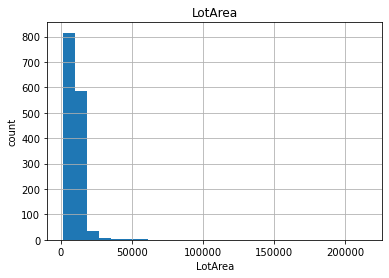

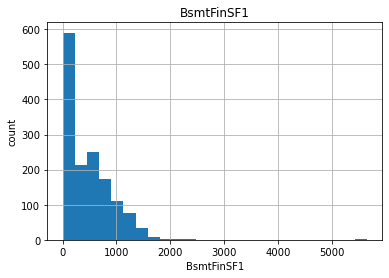

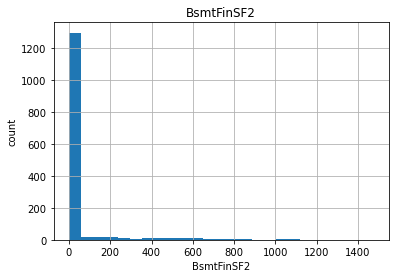

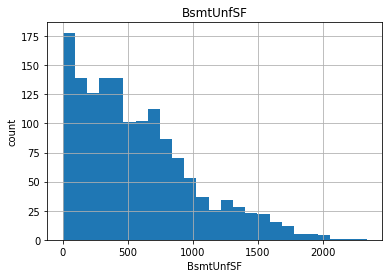

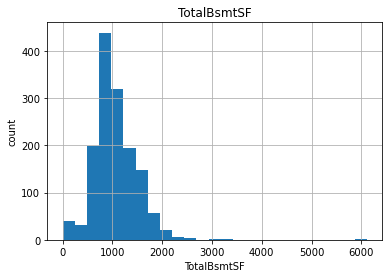

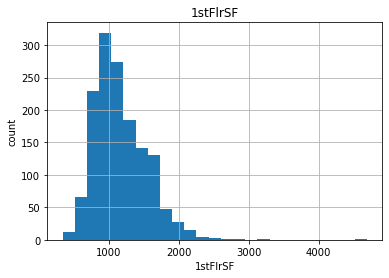

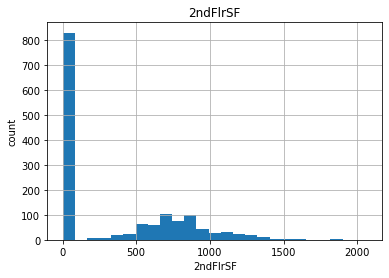

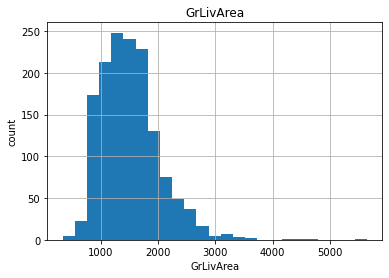

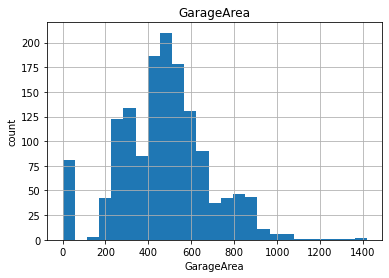

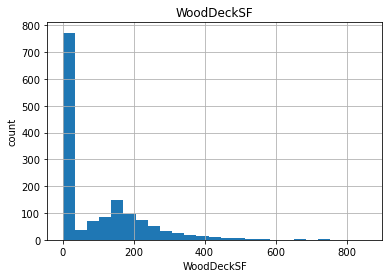

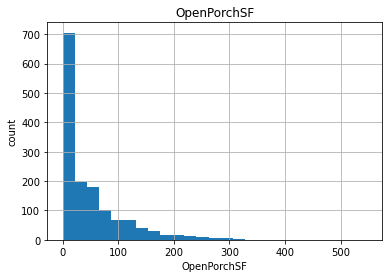

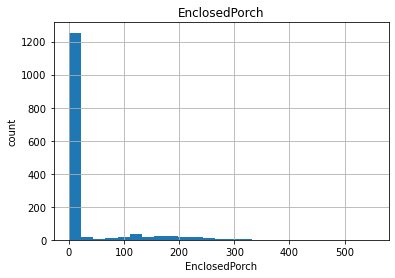

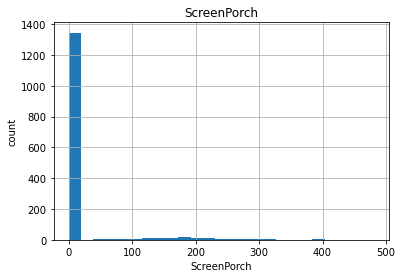

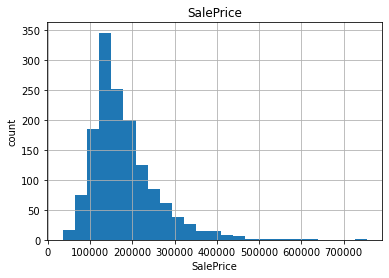

In [35]:
for feature in continous_feature:
        df[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.title(feature)
        plt.show()

As we can see in the graphs,the Continous variables are not distributed normally.
Different transformation techniques are used to convert to ND.

In [36]:
#1. Logarithmic transformation

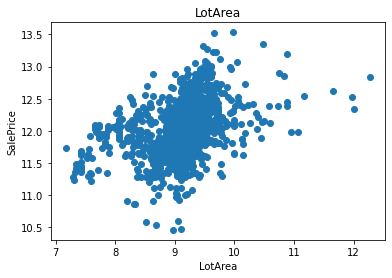

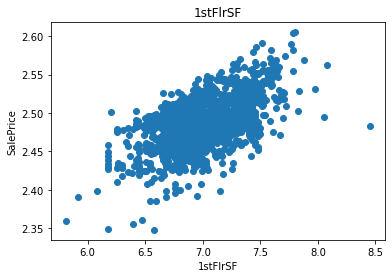

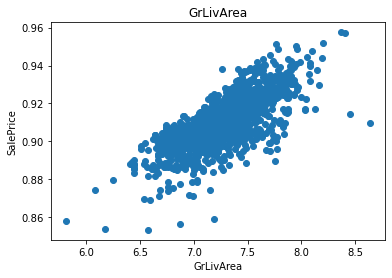

C:\Users\LOKESHRAJ K P\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


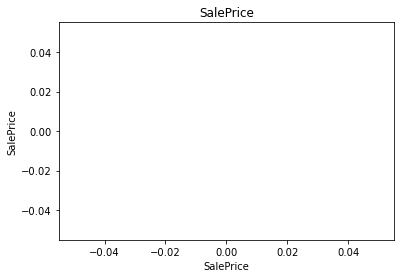

In [37]:
for feature in continous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['SalePrice']=np.log(df['SalePrice'])
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()
        

Outliers

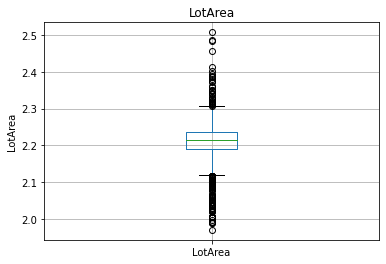

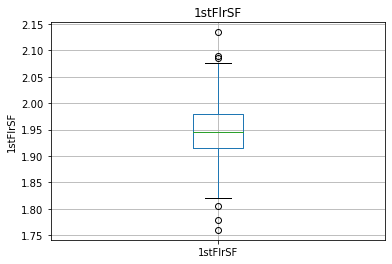

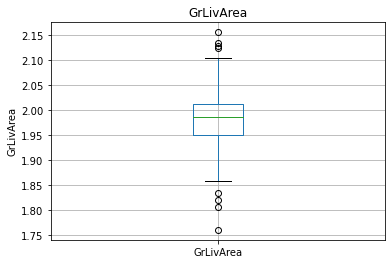

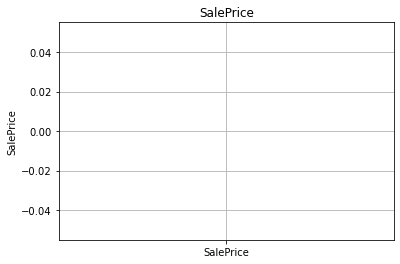

In [38]:
for feature in continous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#Categorical variables

In [39]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [40]:
df[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [41]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is ExterQual and number of categories are 4
The feature is ExterCond and number of c

In [42]:
# relation between categorical fetaures & dependent variable

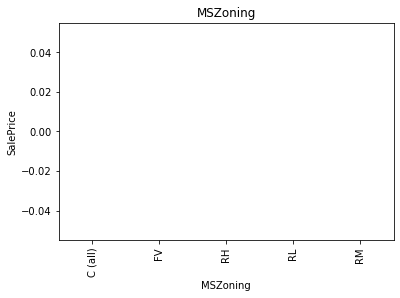

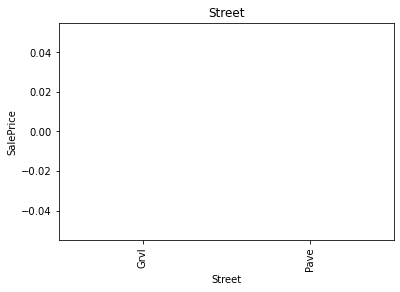

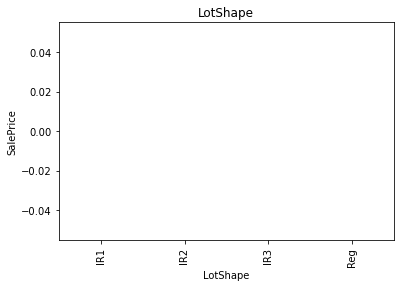

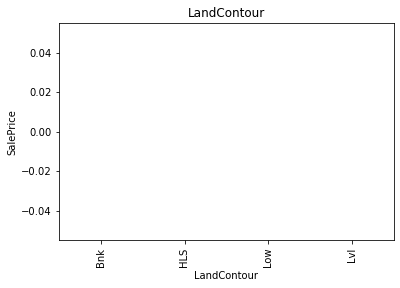

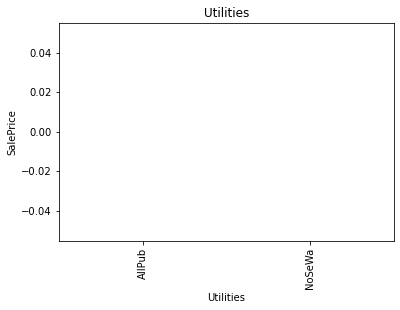

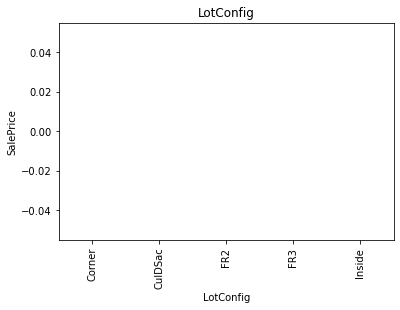

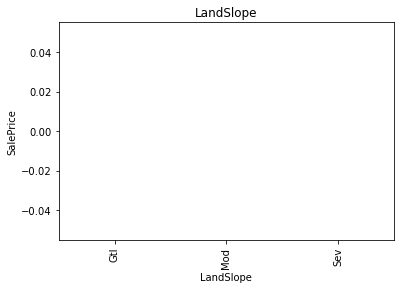

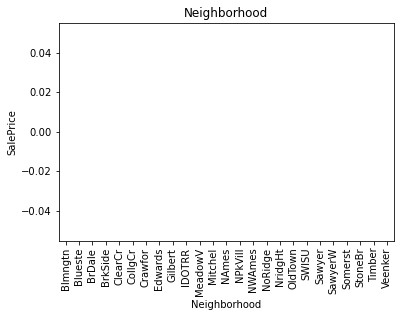

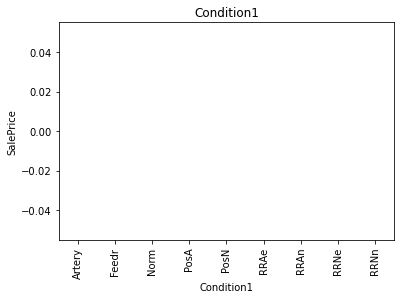

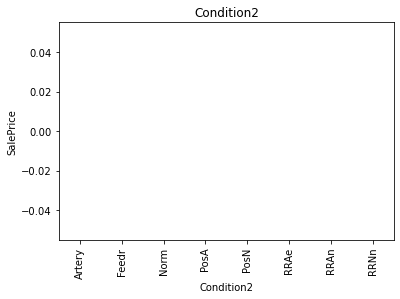

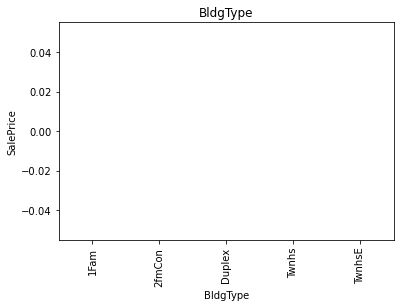

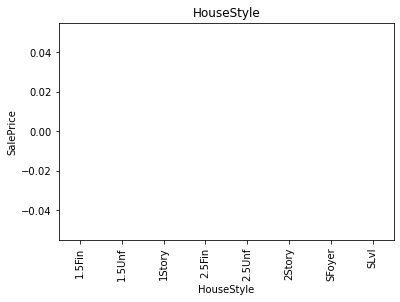

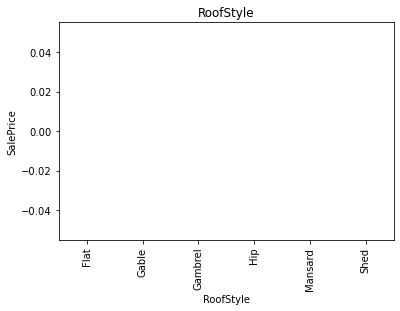

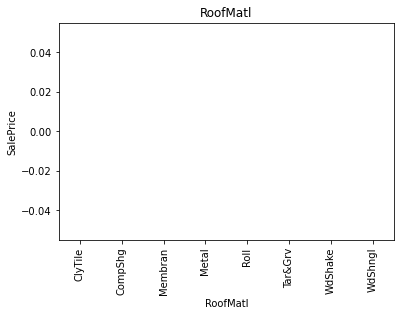

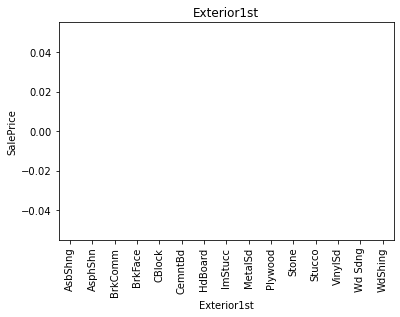

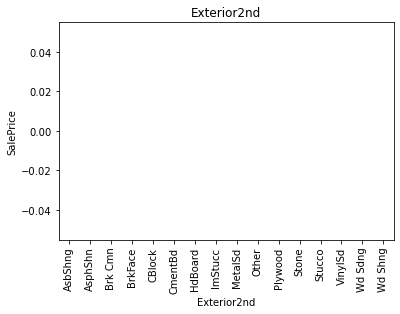

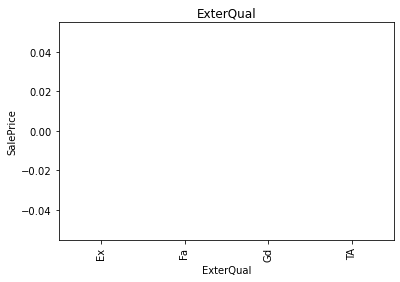

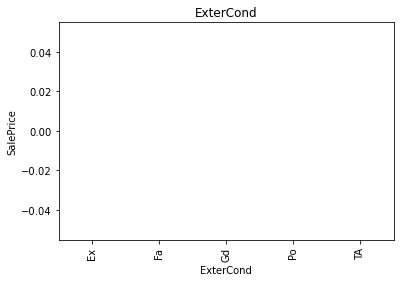

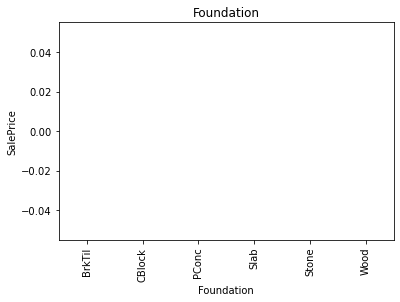

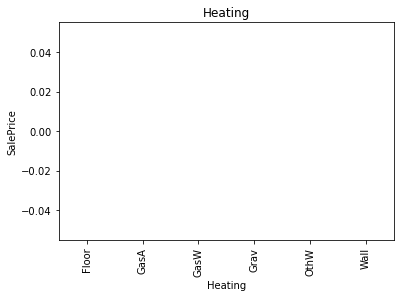

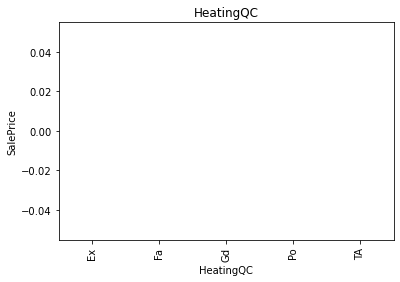

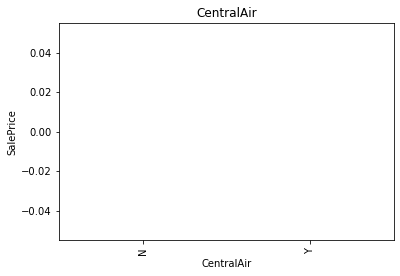

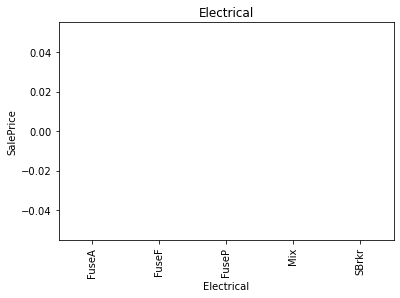

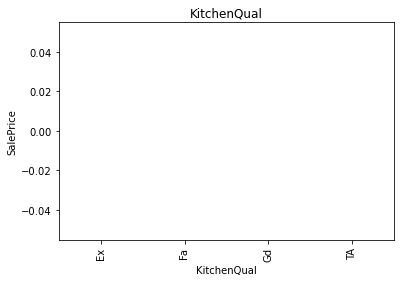

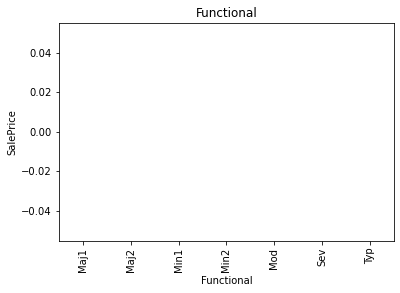

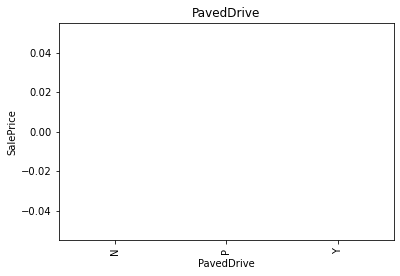

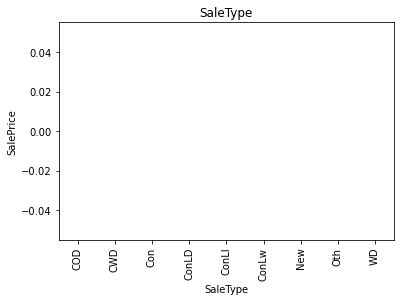

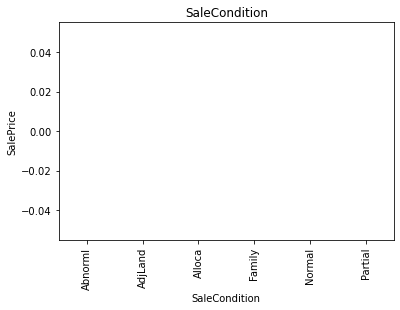

In [43]:
for feature in categorical_features:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Feature engineering

1.Handling missing values
2.Temporal variable
3.Categorical variables
4.Outlier handling
5.Standardization

In [44]:
#Splitting the data as train & test data to avoid data leakage
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.1,random_state=0)
x_train.shape,x_test.shape


((1314, 81), (146, 81))

Missing values

In [45]:
#handling missing values in categorical features
features_nan_cat=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='o']


In [46]:
features_nan_cat

[]

In [47]:
def replace_cat_feature(df,features_nan_cat):
    df[features_nan_cat]=df[features_nan_cat].fillna('missing')
    return df
df=replace_cat_feature(df,features_nan_cat)
df[features_nan_cat].isnull().sum()

Series([], dtype: float64)

In [48]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,0,2.201872,Pave,1,Reg,Lvl,AllPub,...,0.0,1,1,1,0.0,2.0,2008.0,WD,Normal,NaN
1,2.0,20.0,RL,0,2.215885,Pave,1,Reg,Lvl,AllPub,...,0.0,1,1,1,0.0,5.0,2007.0,WD,Normal,NaN
2,3.0,60.0,RL,0,2.233034,Pave,1,IR1,Lvl,AllPub,...,0.0,1,1,1,0.0,9.0,2008.0,WD,Normal,NaN
3,4.0,70.0,RL,0,2.215315,Pave,1,IR1,Lvl,AllPub,...,0.0,1,1,1,0.0,2.0,2006.0,WD,Abnorml,NaN
4,5.0,60.0,RL,0,2.258133,Pave,1,IR1,Lvl,AllPub,...,0.0,1,1,1,0.0,12.0,2008.0,WD,Normal,NaN


In [49]:
#handling missing values in numerical features
num_feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

In [50]:
num_feature_nan

['SalePrice']

In [51]:
for feature in num_feature_nan:
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[num_feature_nan]=df[num_feature_nan].fillna(df[feature].median(),inplace=True)
    

C:\Users\LOKESHRAJ K P\AppData\Local\Temp\ipykernel_12888\2211702874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_feature_nan]=df[num_feature_nan].fillna(df[feature].median(),inplace=True)


In [52]:
df[num_feature_nan].isnull().sum()

SalePrice    1460
dtype: int64

In [53]:
# Temporal variable(Date-Time variables)
for feature in df[year_feature]:
    if feature!='YrSold':
        df[feature]=df['YrSold']-df[feature]


In [54]:
df[year_feature].iloc[:,:-1].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003.0,2003.0,0.0
1,1976.0,1976.0,0.0
2,2001.0,2002.0,0.0
3,1915.0,1970.0,0.0
4,2000.0,2000.0,0.0


In [55]:
for feature in num_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature]) 

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable log method

Handling rare categorical features

In [ ]:
# We will remove categorical variables which are present less than 1%

In [ ]:
categorical_features

In [ ]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [ ]:
df.head()

## Scaling

In [ ]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

In [ ]:
df=pd.concat([df[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],axis=1)